In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nb

In [3]:
sns.set_context('poster')

### Transform cells to Allen brain volume space

In [4]:
def cells2allen(x, y, z, origin=[264, 160, 228], factor=25):
    return x/factor+origin[0], -y/factor+origin[1], z/factor+origin[2]

In [5]:
x, y, z = cells2allen(np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/x.npy'),
                      np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/y.npy'),
                      np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/z.npy'))

In [15]:
allen = nb.load('/home/julia/data/gradients/atlas/allen_api/template.nii.gz').get_data()

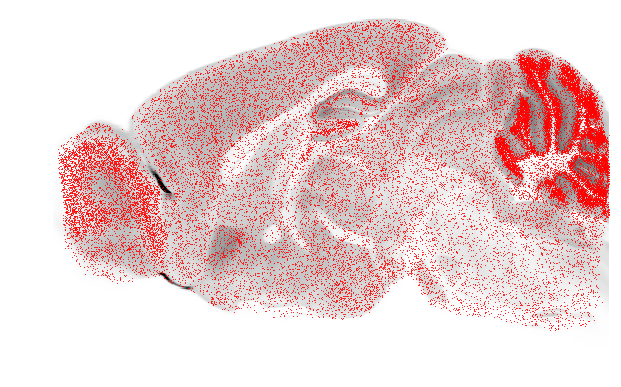

In [25]:
z_slice = 250
z_idx = np.where(np.abs(z-z_slice)<.05)
fig = plt.figure(figsize=(10,10))
plt.imshow((allen[:,:,z_slice].T),  cmap='Greys', aspect='equal');
plt.scatter(x[z_idx], y[z_idx], marker='.', color='red', s=1);
plt.axis('off');

In [14]:
np.save('/home/julia/data/gradients/atlas/epfl_cell_atlas/x2vol.npy', x)
np.save('/home/julia/data/gradients/atlas/epfl_cell_atlas/y2vol.npy', y)
np.save('/home/julia/data/gradients/atlas/epfl_cell_atlas/z2vol.npy', z)

### Transform cells to our template space

In [7]:
def allen2jo(x,y,z):
    return z, -x+528, -y+320

In [8]:
x, y, z = allen2jo(x,y,z)

In [42]:
np.save('/home/julia/data/gradients/atlas/epfl_cell_atlas/x2ABI_template_25um.npy', x)
np.save('/home/julia/data/gradients/atlas/epfl_cell_atlas/y2ABI_template_25um.npy', y)
np.save('/home/julia/data/gradients/atlas/epfl_cell_atlas/z2ABI_template_25um.npy', z)

### Plot cells on our template for testing

In [30]:
jo = nb.load('/home/julia/data/gradients/atlas/ABI_template_25um.nii').get_data()

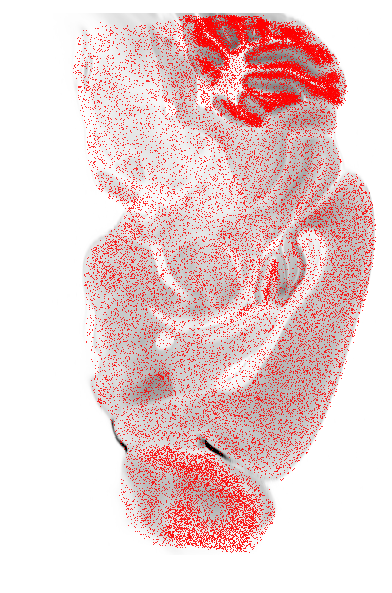

In [41]:
x_slice = 250
x_idx = np.where(np.abs(x-x_slice)<0.05)
sns.set_context('poster')
fig = plt.figure(figsize=(10,10))
plt.imshow(jo[x_slice,:,:],  cmap='Greys', aspect='equal');
plt.scatter(z[x_idx], y[x_idx], marker='.', color='red', s=1);
plt.axis('off');